In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range

In [47]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.naive_bayes import MultinomialNB
import wordcloud
from wordcloud import WordCloud
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier

## Data Preprocessing 
#### Encoding : Since text has lot of emoji's python can't read it.


In [7]:
df = pd.read_csv(r'spam.csv', encoding="ISO-8859-1")

In [8]:
df = df.drop(["Unnamed: 2", "Unnamed: 3","Unnamed: 4"],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Renaming the columns
df.columns = ['labels', 'data']

In [17]:
# Creating binary labels spam [notspam:0, spam:1]
df['b_labels']= df['labels'].map({'ham':0, 'spam':1})

# Creating Y matrix.
Y = df['b_labels']

##### CountVectorizer transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

##### Vector nothing but line drawn between spam and not spam.

In [25]:
# Createing the X - matrix.
count_vectorizer = CountVectorizer(decode_error='ignore')
X = count_vectorizer.fit_transform(df['data'])

In [29]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.33)

## NavieBayes

In [35]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.993838735601393
test score: 0.9825992387166939


### Ada Boost

In [50]:
model = AdaBoostClassifier()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))
df.head()

train score: 0.9772301098312349
test score: 0.9755301794453507


,labels,data,b_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [45]:

def visualize(label):
    words=""
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words+= msg + ''
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

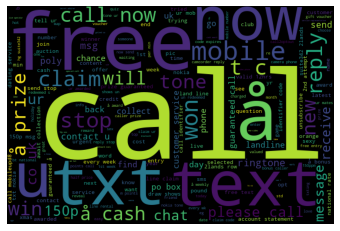

In [46]:
visualize('spam')

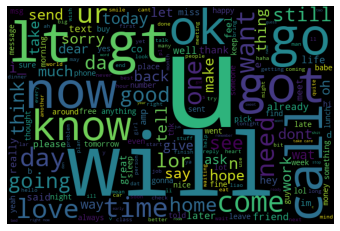

In [48]:
visualize('ham')

In [49]:
# Creating a different column 
# lets  see what was predicted wrongly.
df['predictions'] = model.predict(X)

In [53]:
# These are wrongfully classified as not spam.
# See what you are getting wrong.
sneaky_spam = df[df['predictions']==0 & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)


Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
I HAVE A DATE ON SUNDAY WITH WILL!!
Oh k...i'm watc

Dont you have message offer
HEY THERE BABE, HOW U DOIN? WOT U UP 2 2NITE LOVE ANNIE X.
Remind me how to get there and I shall do so
:-( that's not v romantic!
Hello. Damn this christmas thing. I think i have decided to keep this mp3 that doesnt work.
HI DARLIN IM MISSIN U HOPE YOU ARE HAVING A GOOD TIME. WHEN ARE U BACK AND WHAT TIME IF U CAN GIVE ME A CALL AT HOME. JESS XX
Draw va?i dont think so:)
Dont pick up d call when something important is There to tell. Hrishi
Nothin comes to my mind. ÌÏ help me buy hanger lor. Ur laptop not heavy?
&lt;#&gt; , that's all? Guess that's easy enough
We can make a baby in yo tho
Should I tell my friend not to come round til like  &lt;#&gt; ish?
Friendship poem: Dear O Dear U R Not Near But I Can Hear Dont Get Fear Live With Cheer No More Tear U R Always my Dear. Gud ni8
Still in the area of the restaurant. Ill try to come back soon
Aight that'll work, thanks
I have 2 sleeping bags, 1 blanket and paper and  phone details. Anything else?
So what do y

Dear i am not denying your words please
You know my old Dom I told you about yesterday ? His name is Roger? He got in touch with me last night and wants me to meet him today at 2 pm
COME BACK TO TAMPA FFFFUUUUUUU
2 celebrate my båÕday, y else?
Merry christmas to u too annie!
Please tell me you have some of that special stock you were talking about
I sent them. Do you like?
Awesome, be there in a minute
And that is the problem. You walk around in \julianaland\" oblivious to what is going on around you. I say the same things constantly and they go in one ear and out the other while you go off doing whatever you want to do. It's not that you don't know why I'm upset--it's that you don't listen when i tell you WHAT is going to upset me. Then you want to be surprised when I'm mad."
I've told you everything will stop. Just dont let her get dehydrated.
Or I guess  &lt;#&gt;  min
I'm home. Ard wat time will u reach?
Storming msg: Wen u lift d phne, u say \HELLO\" Do u knw wt is d real meaning 

In [57]:
# Things that should be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in sneaky_spam:
    print(msg)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
I HAVE A DATE ON SUNDAY WITH WILL!!
Oh k...i'm watc

I surely dont forgot to come:)i will always be in touch in with you:-)
Hi kindly give us back our documents which we submitted for loan from STAPATI
I dont have i shall buy one dear
Oh god i am happy to see your message after 3 days
What year. And how many miles.
Hey cutie. How goes it? Here in WALES its kinda ok. There is like hills and shit but i still avent killed myself. 
Sad story of a Man - Last week was my b'day. My Wife did'nt wish me. My Parents forgot n so did my Kids . I went to work. Even my Colleagues did not wish. As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there. She said,'' do u mind if I go into the bedroom for a minute ? '' ''OK'', I sed in a sexy mood. She came out 5 minuts latr wid a cake...n My Wife, My Parents, My Kidz, My Friends n My Colleagues. All screaming.. SURPRISE !! and I was waiting on the sofa.. ... ..... ' NAKED...!
I think you should go the honest

I can't speak, bcaz mobile have problem. I can listen you but you cann't listen my voice. So i calls you later.
HIYA STU WOT U UP 2.IM IN SO MUCH TRUBLE AT HOME AT MOMENT EVONE HATES ME EVEN U! WOT THE HELL AV I DONE NOW? Y WONT U JUST TELL ME TEXT BCK PLEASE LUV DAN 
S...i will take mokka players only:)
Are you still playing with gautham?
Hey mr  and I are going to the sea view and having a couple of gays I mean games! Give me a bell when ya finish 
K, jason says he's gonna be around so I'll be up there around  &lt;#&gt;
Sorry . I will be able to get to you. See you in the morning.
Aight well keep me informed
I am not having her number sir
Am only searching for good dual sim mobile pa.
That seems unnecessarily hostile
Dude got a haircut. Now its breezy up there
1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cancer. 1Lemon/Day=No Fat. 1Cup Milk/day=No Bone Problms 3 Litres Watr/Day=No Diseases Snd ths 2 Whom U Care..:-)
i thought we were doing a king of the hill thing there.
Nope i'll come o